# Gaussian Mixture Models

Gaussian Mixture Models (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. 

- The assumptions is that the data is grouped into a finite number of clusters, each with ellipsoidal shape and we dont know which cluster each instance belongs to. This model is useful for **density estimation, clustering and anomaly detection**.

> **Run the algorithm 2x. One to clean the data, another to get the real insights.** 👇 read below

> Gaussian mixture models try to fit all the data, including the outliers, so if you have too many of them, this will bias the model’s view of “normality”: some outliers may wrongly be considered as nor‐ mal. If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned up dataset. Another approach is to use robust covariance estimation methods (see the EllipticEnvelope class).

## Expectation Maximisation

💪 **clustering like KMeans, but more powerful**

The Expectation- Maximization (EM) algorithm, which has many similarities with the K-Means algorithm: 

- it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the expectation step) then updating the clusters (this is called the maximization step). 


> EM is a generalization of K- Means which not only finds the cluster centers (μ(1) to μ(k)), but also their size, shape and orientation (Σ(1) to Σ(k)), as well as their relative weights (φ(1) to φ(k)). Unlike K- Means, EM uses soft cluster assignments rather than hard assignments

In [1]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

In [ ]:
# hard clustering
gm.predict(X)

# soft clustering (using probabilities)
gm.predict_proba(X)

It is also possible to estimate the density of the model at any given location. This is achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location. The greater the score, the higher the density

> If you compute the exponential of these scores, you get the value of the PDF at the location of the given instances. These are not probabilities, but probability densities: they can take on any positive value, not just between 0 and 1. 

> To estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region (if you do so over the entire space of possible instance loca‐ tions, the result will be 1).

<div>
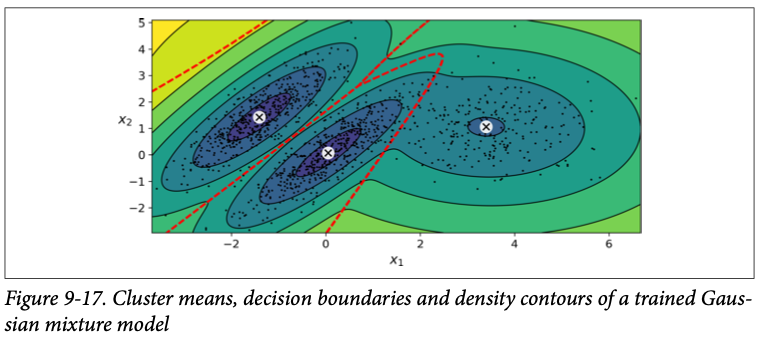
</div>

### Hyperparameters

When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parame‐ ters that the algorithm has to learn: one way to do this is to limit the range of shapes and orientations that the clusters can have. 

This can be achieved by imposing constraints on the covariance matrices. To do this, just set the **covariance_type hyperparameter** to one of the following values:

- "spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).


- "diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).


- "tied": all clusters must have the same ellipsoidal shape, size and orientation (i.e., all clusters share the same covariance matrix).

<div>
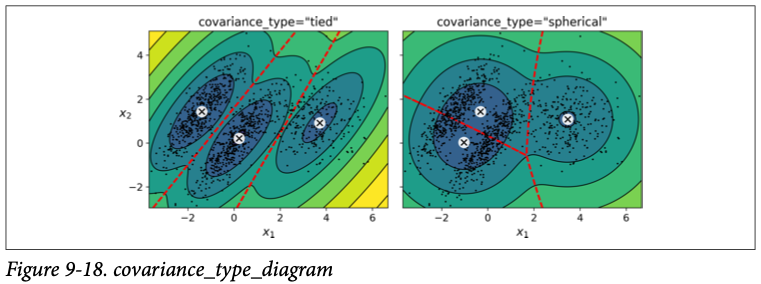
</div>

## Anomaly detection

Anomaly detection (also called outlier detection) is the task of detecting instances that deviate strongly from the norm. 

Anomaly detection is very use‐ ful in a wide variety of applications, for example in fraud detection, or for detecting defective products in manufacturing, or to remove outliers from a dataset before training another model, which can significantly improve the performance of the resulting model.

> Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use.

To identify the outliers using the 4th percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies) 👇

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

<div>
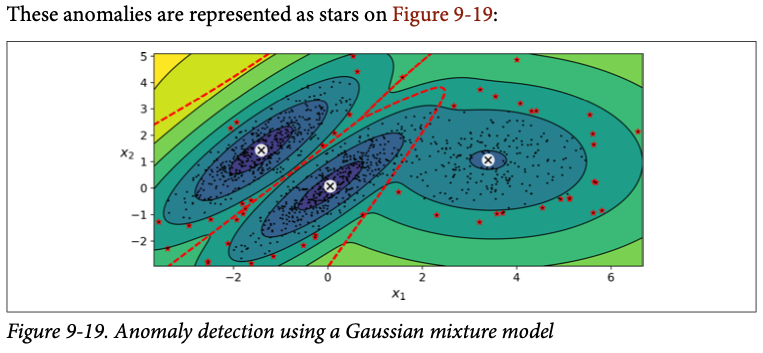
</div>

## Novelty detection

A closely related task is novelty detection: it differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often precisely used to clean up a dataset.

## Selecting the number of clusters

### AIC and BIC

Find the model that minimizes a theoretical information criterion such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC).

Both the BIC and the AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well. They often end up selecting the same model, but when they differ, 
- the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but it does not fit the data quite as well (this is especially true for larger datasets).

> 🔥 Select the k with the lowest value AIC / BIC

<div>
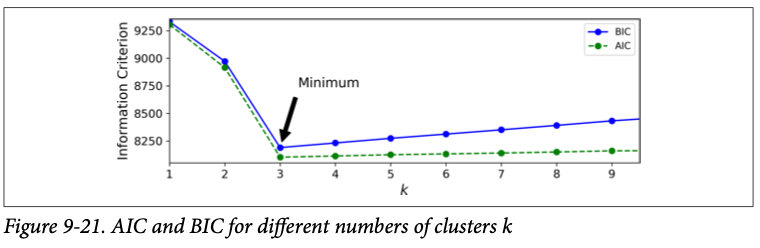
</div>

### Bayesian Gaussian mixture model

Selects automatically the number of clusters.